# 2D and 3D Face Alignment Network
**2D FAN:**

![alt text](https://github.com/sony/nnabla-examples/raw/master/facial-keypoint-detection/face-alignment/results/example1.png)![alt text](https://github.com/sony/nnabla-examples/raw/master/facial-keypoint-detection/face-alignment/results/example2.png)

**3D FAN:**
![alt text](https://github.com/sony/nnabla-examples/raw/master/facial-keypoint-detection/face-alignment/results/example1_3d.png)![alt text](https://github.com/sony/nnabla-examples/raw/master/facial-keypoint-detection/face-alignment/results/example2_3d.png)

Here we'll show you a facial landmark detection example using [FAN (Face Alignment Network)](https://arxiv.org/pdf/1703.07332.pdf). 

# Preparation

First, we need to have [nnabla-examples repository](https://github.com/sony/nnabla-examples) and install nnabla. The following cell does both. Also, when you're running on Colab, make sure that your Runtime setting is set as GPU, which can be set up from the top menu (Runtime → change runtime type), and make sure to click **Connect** on the top right-hand side of the screen before you start.

In [ ]:
!pip install nnabla-ext-cuda100
!git clone https://github.com/sony/nnabla-examples.git
%run nnabla-examples/interactive-demos/colab_utils.py
%cd nnabla-examples/facial-keypoint-detection/face-alignment

     |████████████████████████████████| 51.4 MB 18.3 MB/s 
     |████████████████████████████████| 18.9 MB 10.7 MB/s 
     |████████████████████████████████| 131 kB 36.1 MB/s 
     |████████████████████████████████| 8.5 MB 35.0 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 138 kB 45.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Cloning into 'nnabla-examples'...
remote: Enumerating objects: 6787, done.
remote: Counting objects: 100% (25

Then, we need to download the pretrained weights and face detection model.

In [ ]:
# get 2D FAN pretrained weights.
!wget https://nnabla.org/pretrained-models/nnabla-examples/face-alignment/2DFAN4_NNabla_model.h5

# to run the 3D facial landmark detection, we need to have additional weights as well.
!wget https://nnabla.org/pretrained-models/nnabla-examples/face-alignment/3DFAN4_NNabla_model.h5
!wget https://nnabla.org/pretrained-models/nnabla-examples/face-alignment/Resnet_Depth_NNabla_model.h5

# get dlib's face detection model.
!wget http://dlib.net/files/mmod_human_face_detector.dat.bz2

--2022-01-02 11:00:20--  https://nnabla.org/pretrained-models/nnabla-examples/face-alignment/2DFAN4_NNabla_model.h5
Resolving nnabla.org (nnabla.org)... 13.249.137.98, 13.249.137.104, 13.249.137.67, ...
Connecting to nnabla.org (nnabla.org)|13.249.137.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96740504 (92M) [binary/octet-stream]
Saving to: ‘2DFAN4_NNabla_model.h5’

2DFAN4_NNabla_model 100%[===================>]  92.26M   105MB/s    in 0.9s    

2022-01-02 11:00:21 (105 MB/s) - ‘2DFAN4_NNabla_model.h5’ saved [96740504/96740504]

--2022-01-02 11:00:21--  https://nnabla.org/pretrained-models/nnabla-examples/face-alignment/3DFAN4_NNabla_model.h5
Resolving nnabla.org (nnabla.org)... 13.249.137.98, 13.249.137.104, 13.249.137.67, ...
Connecting to nnabla.org (nnabla.org)|13.249.137.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96740504 (92M) [binary/octet-stream]
Saving to: ‘3DFAN4_NNabla_model.h5’

3DFAN4_NNabla_model 100%[===

# Upload an image

Run the below cell to upload an image to use FAN. Make sure to select **just 1 image** (if you upload multiple images, all the images but the last one will be ignored) and that image must contain at least one face.

In [ ]:
from google.colab import files

img = files.upload()

Saving image (1).png to image (1).png


For convenience, rename the image file.

In [ ]:
import os
ext = os.path.splitext(list(img.keys())[-1])[-1]
os.rename(list(img.keys())[-1], "input_image{}".format(ext)) 

input_img = "input_image" + ext

# Run 2D FAN & Visualize the result

Now that we have the image to use, let's run 2D FAN and see the result. The following cell executes FAN network and generates the output image named "output_image.png".

2022-01-02 13:13:01,997 [nnabla][INFO]: Initializing CPU extension...
/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-01-02 13:13:02,954 [nnabla][INFO]: Running in cudnn
2022-01-02 13:13:02,995 [nnabla][INFO]: Initializing CUDA extension...
2022-01-02 13:13:03,005 [nnabla][INFO]: Initializing cuDNN extension...
Loading FAN weights...


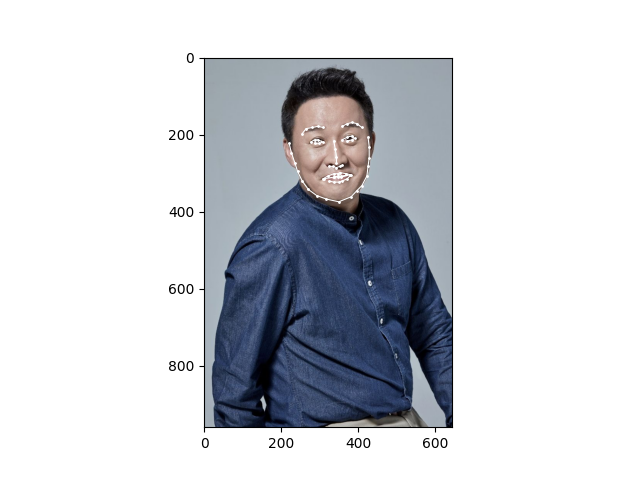

In [ ]:
!python model_inference.py --model 2DFAN4_NNabla_model.h5 --test-image $input_img --output output_image.png

from IPython.display import Image,display
display(Image('output_image.png'))

# Run 3D FAN & Visualize the result

Next, let's see what happens if we use 3D landmark detection. The following cell executes 3D FAN and generate the output image named "output_image_3D.png".

2022-01-02 13:13:10,060 [nnabla][INFO]: Initializing CPU extension...
/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
2022-01-02 13:13:11,039 [nnabla][INFO]: Running in cudnn
2022-01-02 13:13:11,077 [nnabla][INFO]: Initializing CUDA extension...
2022-01-02 13:13:11,084 [nnabla][INFO]: Initializing cuDNN extension...
Loading FAN weights...
Loading ResNetDepth weights...


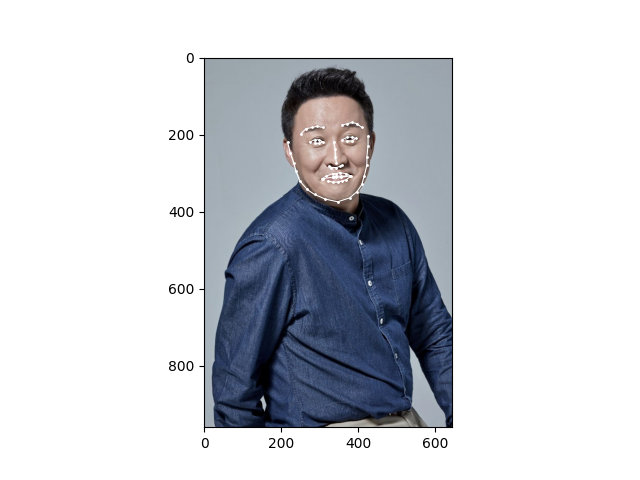

In [ ]:
!python model_inference.py --landmarks-type-3D --model 3DFAN4_NNabla_model.h5 --resnet-depth-model Resnet_Depth_NNabla_model.h5 --test-image $input_img --output output_image_3D.png

display(Image('output_image_3D.png'))

# Visualize the 3D FAN result with 3D plot

The image above shows the keypoints, but since it is rendered on 2D image it's hard to tell the difference from the 2D result. So next we use mplot3d to see how the detected keypoints are represented in the 3D space. Note that the script below is a partially modified version of model_inference.py [as of ver 1.9.0](https://github.com/sony/nnabla-examples/blob/release/v1.9.0-branch/facial-keypoint-detection/face-alignment/model_inference.py), so there might be some difference in the later version.


In [ ]:
#@title First let's start by importing dependencies. (double-click to see the codes)
import cv2
import dlib
import nnabla as nn
import nnabla.functions as F
from skimage import io, color
from model import fan, resnet_depth
from external_utils import *
import numpy as np

This is the main part of the keypoint detection. Using the uploaded images above, we first detect the face region with dlib, then crop that area to extract the facial image, and finally run the FAN to get the predicted keypoints.

In [ ]:
#@title Execute Face Detection and FAN. (double-click to see the codes)
from nnabla.ext_utils import get_extension_context
ctx = get_extension_context("cudnn")
nn.set_default_context(ctx)
nn.set_auto_forward(True)

image = io.imread(input_img)
if image.ndim == 2:
    image = color.gray2rgb(image)
elif image.ndim == 4:
    image = image[..., :3]

face_detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")
detected_faces = face_detector(cv2.cvtColor(image[..., ::-1].copy(), cv2.COLOR_BGR2GRAY))
detected_faces = [[d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom()] for d in detected_faces]

if len(detected_faces) == 0:
    print("Warning: No faces were detected.")
    sys.exit()

# Load FAN weights
with nn.parameter_scope("FAN"):
    print("Loading FAN weights...")
    nn.load_parameters("3DFAN4_NNabla_model.h5")

# Load ResNetDepth weights
with nn.parameter_scope("ResNetDepth"):
    print("Loading ResNetDepth weights...")
    nn.load_parameters("Resnet_Depth_NNabla_model.h5")

landmarks = []
for i, d in enumerate(detected_faces):
    center = [d[2] - (d[2] - d[0]) / 2.0, d[3] - (d[3] - d[1]) / 2.0]
    center[1] = center[1] - (d[3] - d[1]) * 0.12
    scale = (d[2] - d[0] + d[3] - d[1]) / 195
    inp = crop(image, center, scale)
    inp = nn.Variable.from_numpy_array(inp.transpose((2, 0, 1)))
    inp = F.reshape(F.mul_scalar(inp, 1 / 255.0), (1,) + inp.shape)
    with nn.parameter_scope("FAN"):
        out = fan(inp, 4)[-1]
    pts, pts_img = get_preds_fromhm(out, center, scale)
    pts, pts_img = F.reshape(pts, (68, 2)) * \
        4, F.reshape(pts_img, (68, 2))

    heatmaps = np.zeros((68, 256, 256), dtype=np.float32)
    for i in range(68):
        if pts.d[i, 0] > 0:
            heatmaps[i] = draw_gaussian(
                heatmaps[i], pts.d[i], 2)
    heatmaps = nn.Variable.from_numpy_array(heatmaps)
    heatmaps = F.reshape(heatmaps, (1,) + heatmaps.shape)
    with nn.parameter_scope("ResNetDepth"):
        depth_pred = F.reshape(resnet_depth(
            F.concatenate(inp, heatmaps, axis=1)), (68, 1))
    pts_img = F.concatenate(
        pts_img, depth_pred * (1.0 / (256.0 / (200.0 * scale))), axis=1)


Loading FAN weights...
Loading ResNetDepth weights...


We now prepare for the visualization with mplot3d. The code below is from [the original author's repository](https://github.com/1adrianb/face-alignment/blob/master/examples/detect_landmarks_in_image.py).

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import collections

In [ ]:
pred_type = collections.namedtuple('prediction_type', ['slice', 'color'])
pred_types = {'face': pred_type(slice(0, 17), (0.682, 0.780, 0.909, 0.5)),
              'eyebrow1': pred_type(slice(17, 22), (1.0, 0.498, 0.055, 0.4)),
              'eyebrow2': pred_type(slice(22, 27), (1.0, 0.498, 0.055, 0.4)),
              'nose': pred_type(slice(27, 31), (0.345, 0.239, 0.443, 0.4)),
              'nostril': pred_type(slice(31, 36), (0.345, 0.239, 0.443, 0.4)),
              'eye1': pred_type(slice(36, 42), (0.596, 0.875, 0.541, 0.3)),
              'eye2': pred_type(slice(42, 48), (0.596, 0.875, 0.541, 0.3)),
              'lips': pred_type(slice(48, 60), (0.596, 0.875, 0.541, 0.3)),
              'teeth': pred_type(slice(60, 68), (0.596, 0.875, 0.541, 0.4))
              }

features= ['face']
x= [260.40002 268.80002 279.6     286.80002 298.80002 321.6     344.40002
 378.      416.40002 453.6     476.40002 492.00003 499.2     507.6
 507.6     511.2     511.2    ] y= [219. 247. 273. 295. 320. 342. 355. 367. 374. 364. 348. 329. 307. 279.
 257. 228. 203.]
features= ['eyebrow1']
x= [302.40002 318.      337.2     351.6     370.80002] y= [197. 184. 181. 178. 181.]
features= ['eyebrow2']
x= [430.80002 446.40002 462.00003 476.40002 492.00003] y= [175. 171. 168. 171. 181.]
features= ['nose']
x= [404.40002 409.2     409.2     412.80002] y= [219. 238. 257. 273.]
features= ['nostril']
x= [390.00003 397.2     412.80002 423.6     430.80002] y= [282. 285. 285. 282. 279.]
features= ['eye1']
x= [328.80002 344.40002 358.80002 370.80002 358.80002 344.40002] y= [219. 213. 213. 219. 222. 222.]
features= ['eye2']
x= [430.80002 446.40002 462.00003 472.80002 462.00003 446.40002] y= [213. 206. 206. 209. 216. 216.]
features= ['lips']
x= [367.2     381.6     400.80002 412.80002 423.

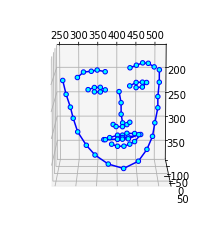

In [ ]:
#@title Visualize the result. (double-click to see the codes)
# uncomment the line below if you run this in jupyter notebook.
#matplotlib notebook

fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.scatter(pts_img.d[:, 0] * 1.2,
                  pts_img.d[:, 1],
                  pts_img.d[:, 2],
                  c='cyan',
                  alpha=1.0,
                  edgecolor='b')

for pred_type in pred_types.values():
    ax.plot3D(pts_img.d[pred_type.slice, 0] * 1.2,
              pts_img.d[pred_type.slice, 1],
              pts_img.d[pred_type.slice, 2], color='blue')
    

    fes = [k for k, v in pred_types.items() if v == pred_type]
    print("features=",fes)
    print("x=",pts_img.d[pred_type.slice, 0] * 1.2,"y=",pts_img.d[pred_type.slice, 1])


ax.view_init(elev=100., azim=90.)
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()